In [157]:
#import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openml as oml
from sklearn.datasets import load_iris,fetch_openml
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from matplotlib import cm
from sklearn.model_selection import (TimeSeriesSplit, KFold, ShuffleSplit, train_test_split,
                                     StratifiedKFold, GroupShuffleSplit,
                                     GroupKFold, StratifiedShuffleSplit, cross_val_score)
from matplotlib.patches import Patch



In [158]:
#Hide convergences warning
import warnings
from sklearn.exceptions import ConvergenceWarning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [159]:
#Download NO2 data
no2 = oml.datasets.get_dataset(547)
X, y, _, _ = no2.get_data(target=no2.default_target_attribute)
attribute_names = list(X)
attribute_names

['cars_per_hour',
 'temperature_at_2m',
 'wind_speed',
 'temperature_diff_2m_25m',
 'wind_direction',
 'hour_of_day',
 'day']

In [160]:
df = pd.DataFrame(X, columns = attribute_names).join(pd.DataFrame(list(y), columns = ['target']))
df = df.sort_values(['day', 'hour_of_day']).drop(columns = 'day')
X.drop(columns = 'day', inplace = True)


C:\Users\levan\AppData\Local\Temp\ipykernel_5576\925390905.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  df.drop('wind_direction',axis=1).plot(use_index=False,figsize=(20,5),cmap=cm.get_cmap('brg'));


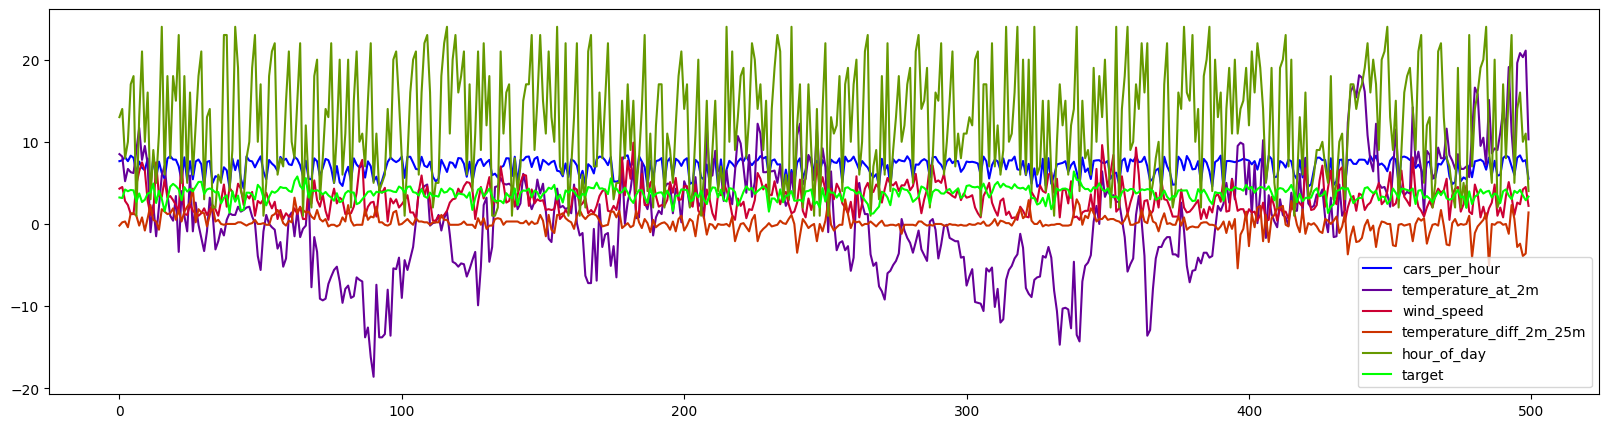

In [161]:
df.drop('wind_direction',axis=1).plot(use_index=False,figsize=(20,5),cmap=cm.get_cmap('brg'));


In [162]:
def evaluate_learners(models, X, y):
    kfold = KFold(n_splits = 5)
    train_scores = []
    test_scores = []
    for model in models:
        train_scores.append(cross_val_score(model, X, X, cv = kfold))
        test_scores.append(cross_val_score(model, X, y, cv = kfold))
        
    return train_scores, test_scores

In [ ]:
models = [linear_model.ARDRegression(), linear_model.ElasticNet(), linear_model.Lasso(), linear_model.Ridge(), KNeighborsRegressor()]
train_scores, test_scores = evaluate_learners(models, X, y)


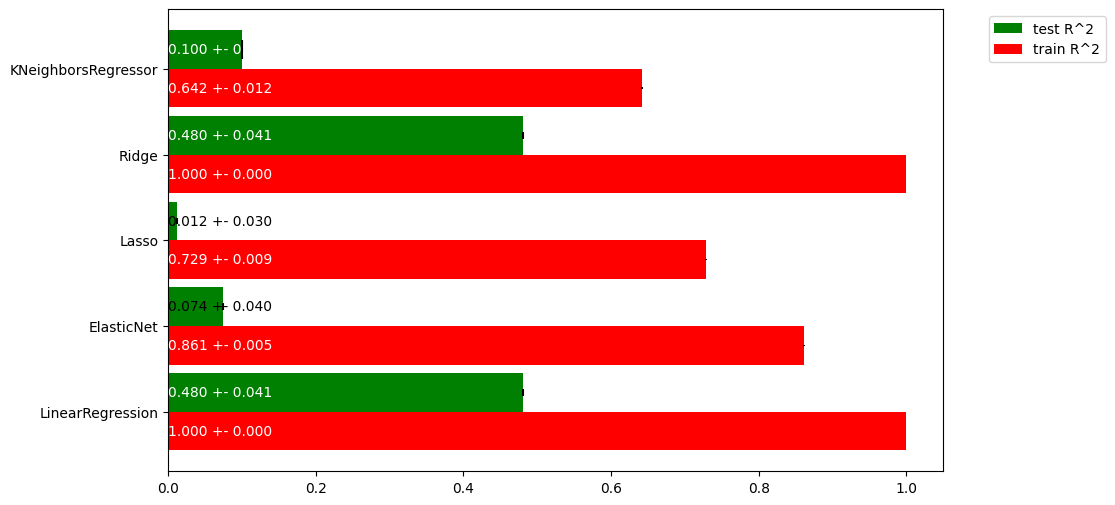

In [164]:
fig, ax = plt.subplots(figsize=(10,6))
width=0.45

ax.barh(np.arange(len(train_scores)), np.mean(test_scores, axis=1), width,
        yerr= np.std(test_scores, axis=1), color='green', label='test R^2')
ax.barh(np.arange(len(train_scores))-width, np.mean(train_scores, axis=1), width,
        yerr= np.std(train_scores, axis=1), color='red', label='train R^2')
for i, te, tr in zip(np.arange(len(train_scores)),test_scores,train_scores):
    ax.text(0, i, "{:.3f} +- {:.3f}".format(np.mean(te),np.std(te)), color=('white' if np.mean(te)>0.1 else 'black'), va='center')
    ax.text(0, i-width, "{:.3f} +- {:.3f}".format(np.mean(tr),np.std(tr)), color=('white' if np.mean(tr)>0.1 else 'black'), va='center')
labels = [c.__class__.__name__ if not hasattr(c, 'steps') else c.steps[0][0] + "_" + c.steps[1][0] for c in models]
ax.set(yticks=np.arange(len(train_scores))-width/2, yticklabels=labels)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)

plt.show()